In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer


In [38]:
df=pd.read_csv('concrete.csv')
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [39]:
df.shape

(1030, 9)

In [40]:
df.isnull().sum()

Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64

In [41]:
df.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [42]:
x=df.drop(columns=['CompressiveStrength'])
y=df.iloc[:,-1]

In [43]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

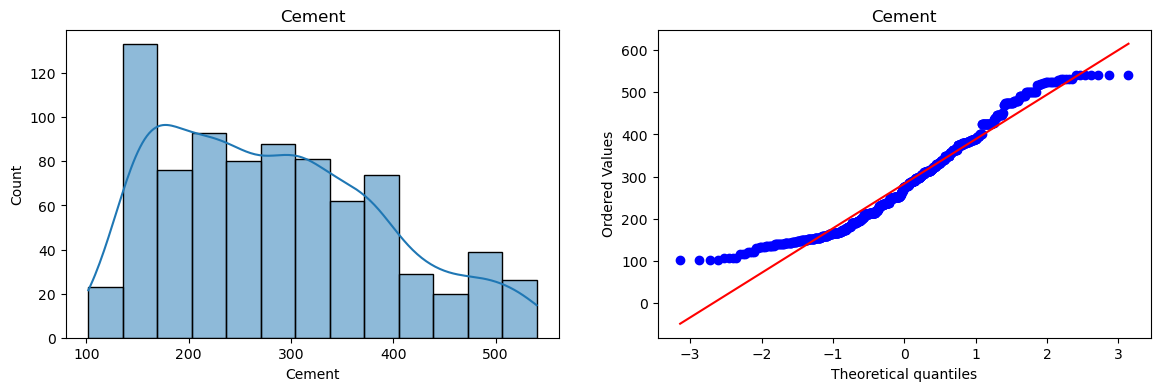

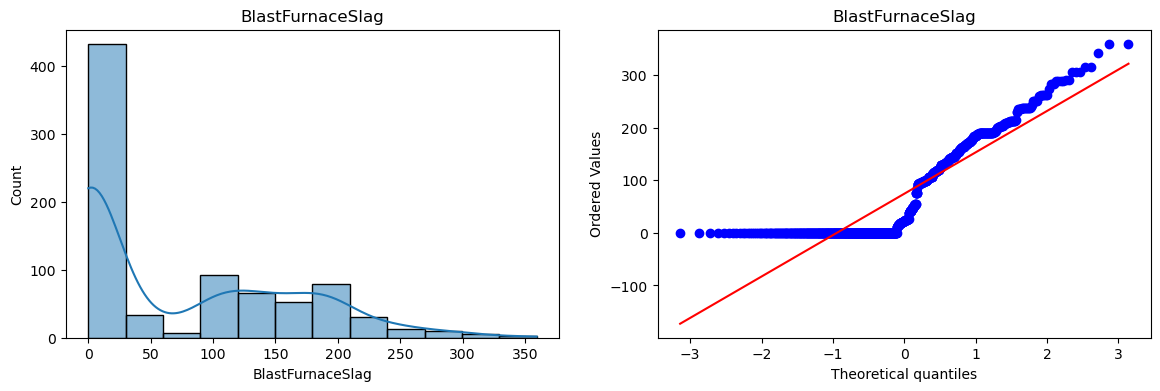

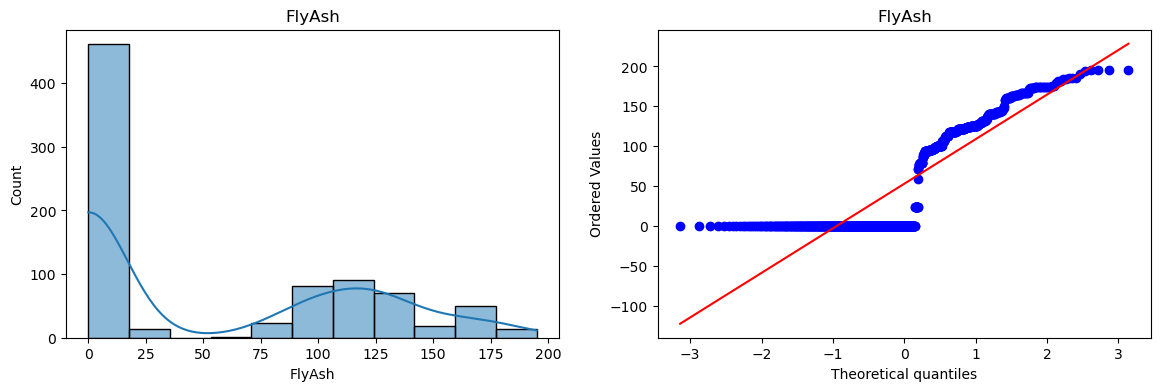

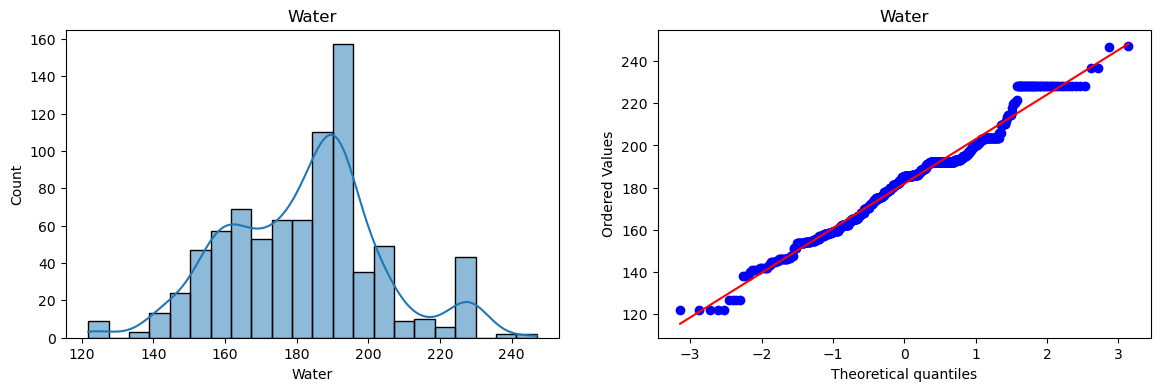

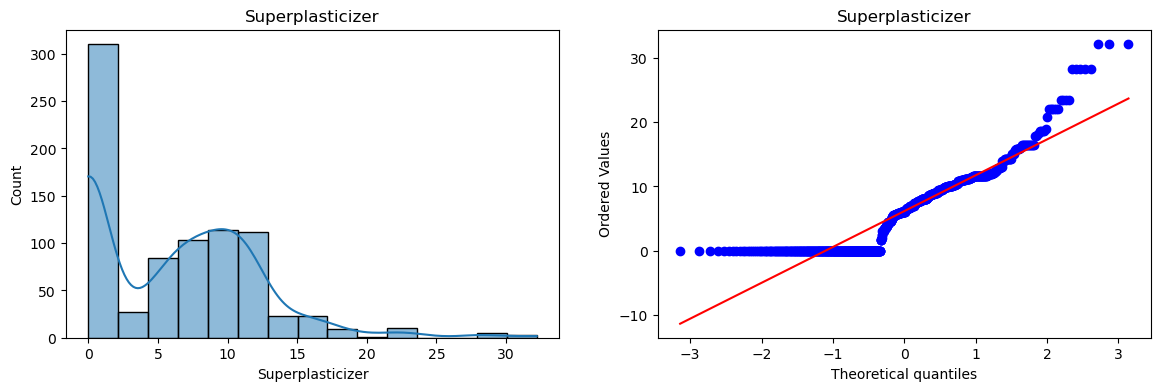

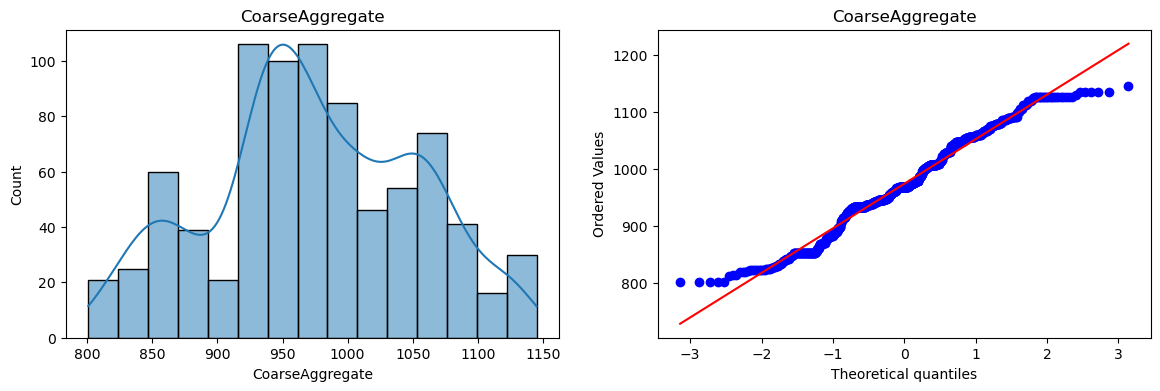

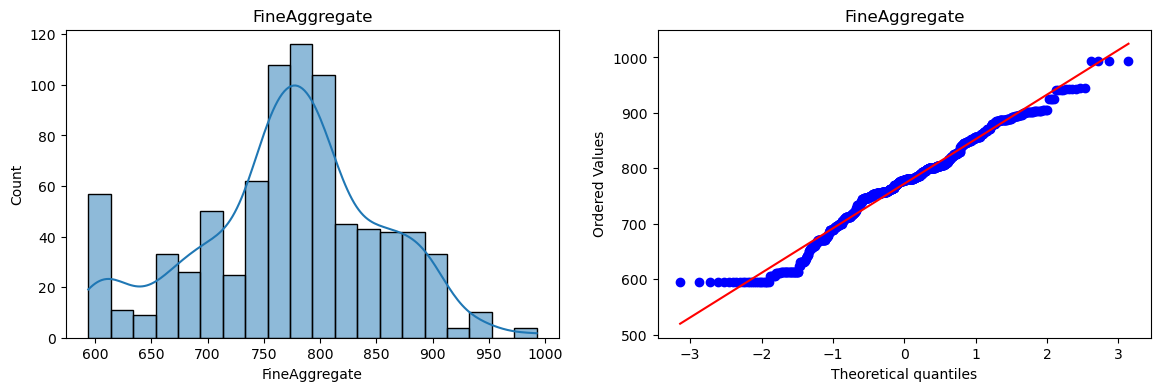

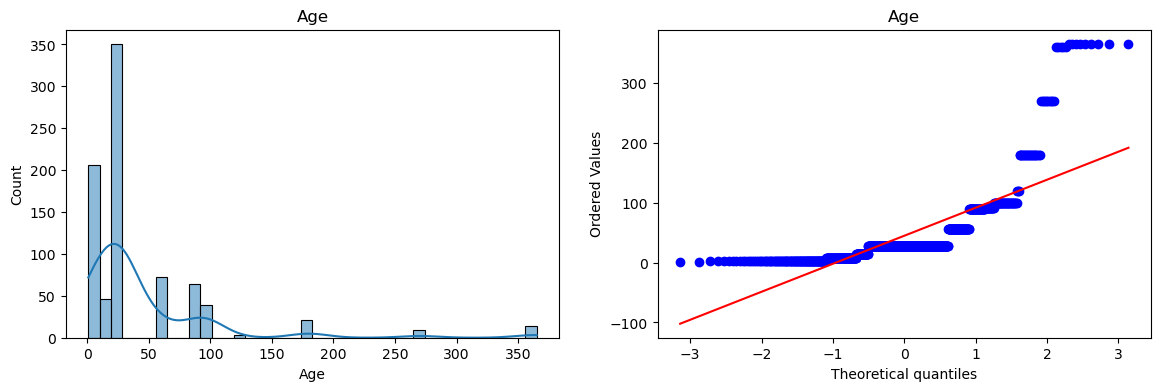

In [44]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()

In [45]:
pt=PowerTransformer(method='box-cox')
X_train_trans=pt.fit_transform(X_train+0.000001)
X_test_trans=pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,BlastFurnaceSlag,0.025093
2,FlyAsh,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,CoarseAggregate,1.129813
6,FineAggregate,1.782018
7,Age,0.066631


In [47]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred=lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.8047825011695537

In [49]:
pt=PowerTransformer(method='box-cox')
X_trans=pt.fit_transform(x+0.000001)
lr=LinearRegression()
np.mean(cross_val_score(lr,X_trans,y,scoring='r2'))

0.6662950324463971

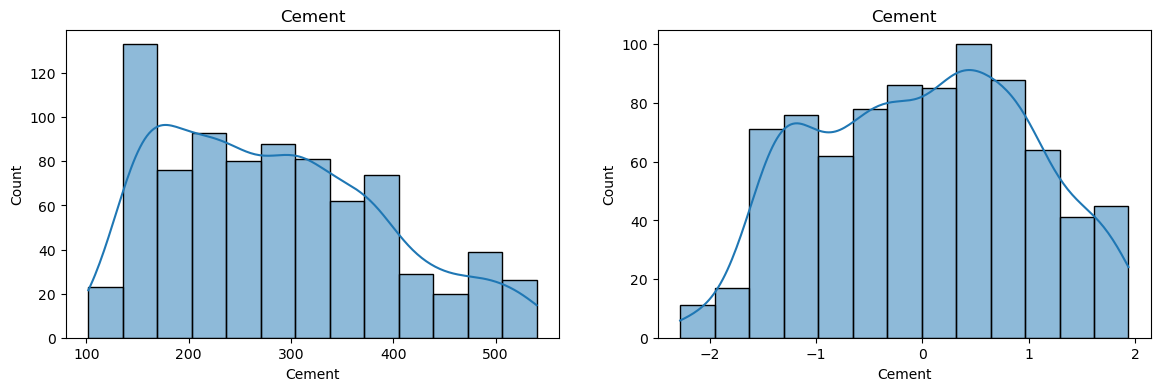

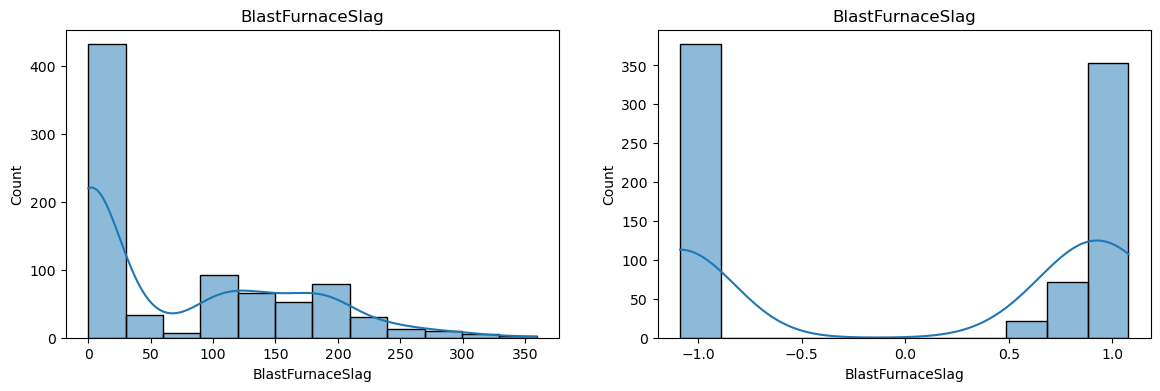

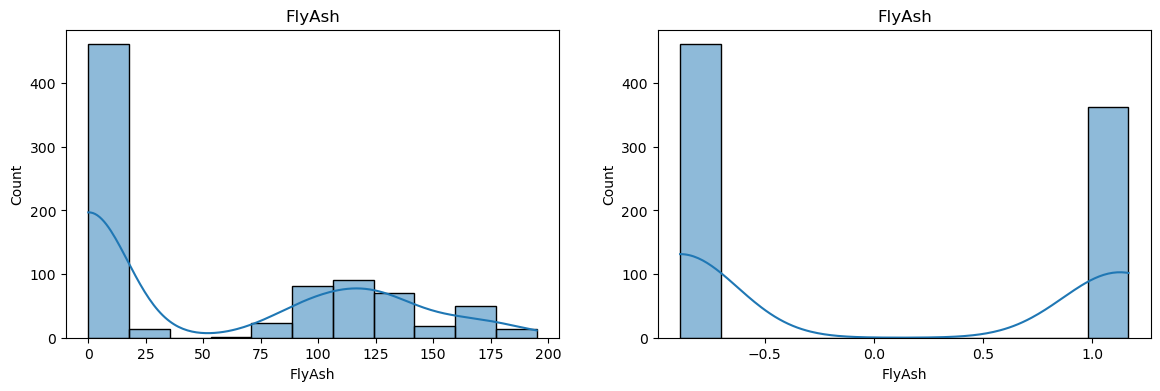

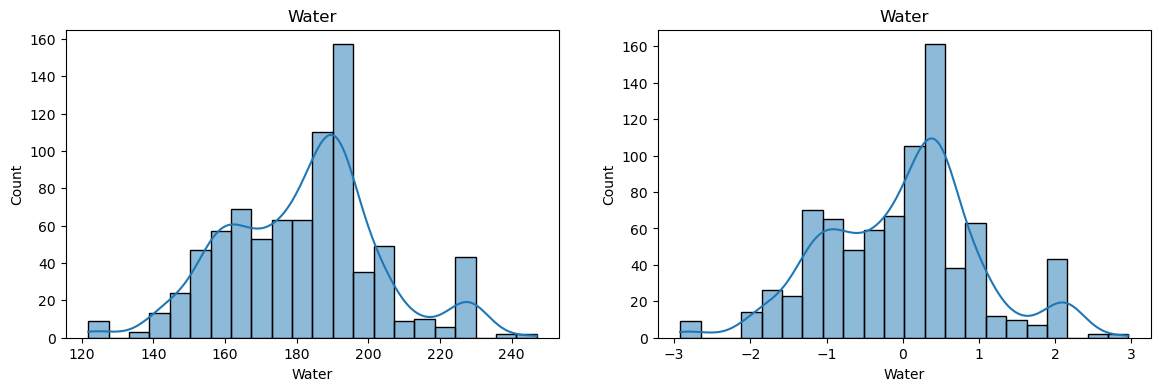

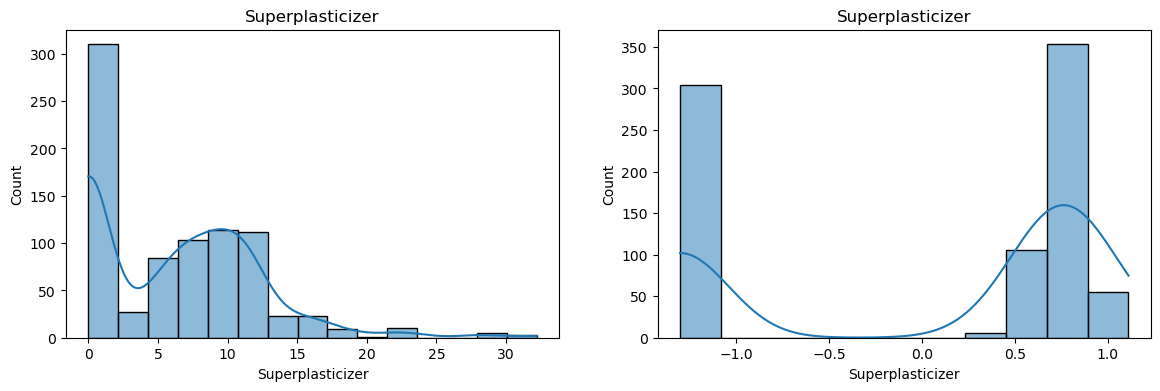

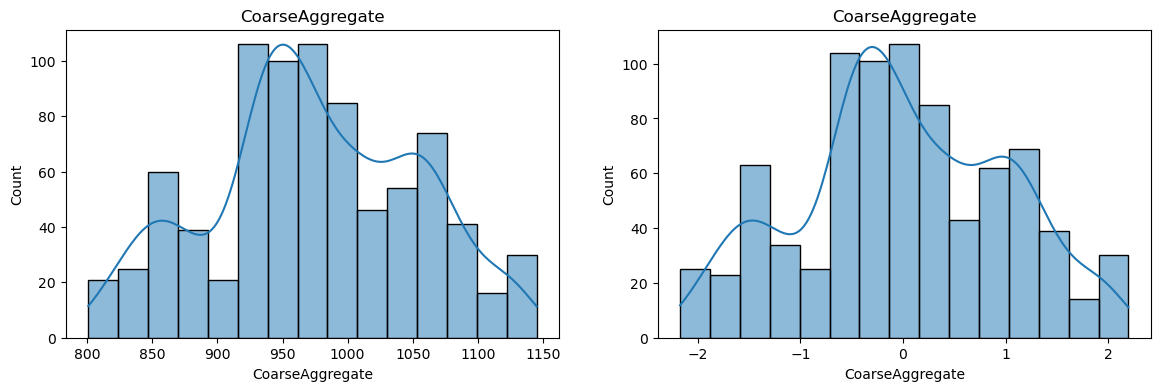

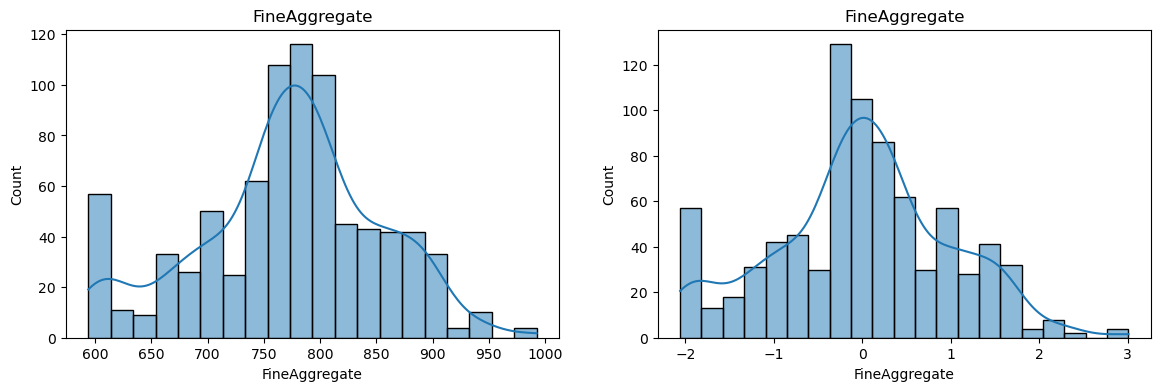

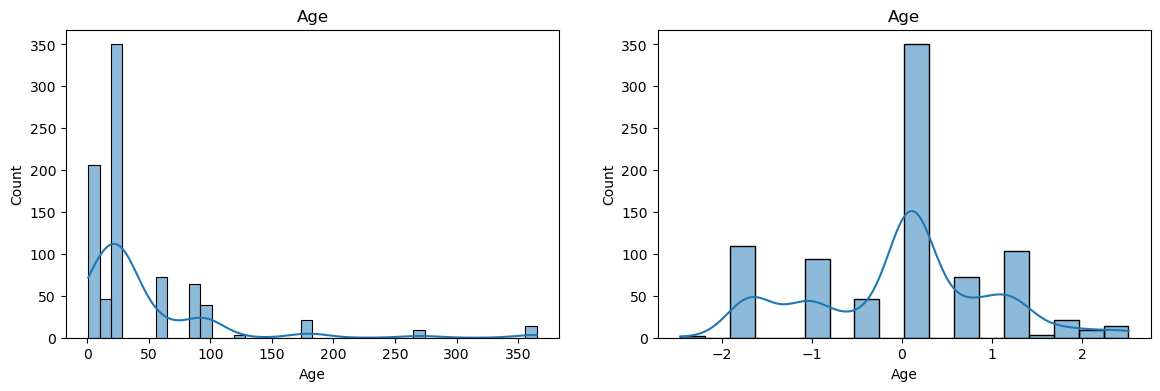

In [53]:

X_train_trans=pd.DataFrame(X_train_trans,columns=X_train.columns)
for col in X_train_trans.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)
    plt.subplot(122)
    sns.histplot(X_train_trans[col],kde=True)
    plt.title(col)
    plt.show()

In [58]:
pt1=PowerTransformer()
X_train_trans2=pt1.fit_transform(X_train+0.000001)
X_test_trans2=pt1.transform(X_test+0.000001)
lr=LinearRegression()
lr.fit(X_train_trans2,y_train)
y_pred3=lr.predict(X_test_trans2)
print(r2_score(y_test,y_pred3))
pd.DataFrame({'cols':X_train.columns,'yeo_jhonson_lambdas':pt1.lambdas_})

0.8161906545593434


,cols,yeo_jhonson_lambdas
0,Cement,0.174348
1,BlastFurnaceSlag,0.015715
2,FlyAsh,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,CoarseAggregate,1.130050
6,FineAggregate,1.783100
7,Age,0.019885


In [59]:
pt=PowerTransformer()
X_trans2=pt.fit_transform(x)
lr=LinearRegression()
np.mean(cross_val_score(lr,X_trans2,y,scoring='r2'))

0.6834625141500865